<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Zero_Weights_ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns

# Create a valid Dataset:

In [37]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

<Axes: >

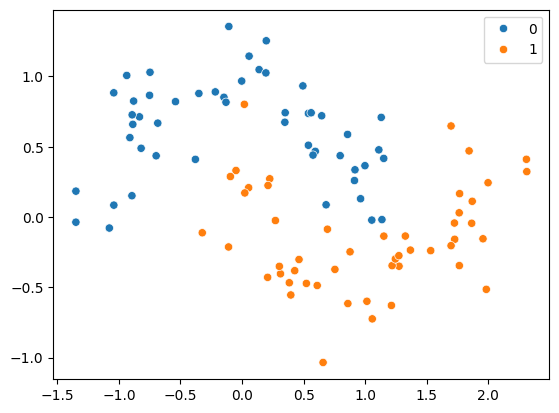

In [38]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# Create a ANN Model:

# For activation function "ReLU":

In [39]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Early Stoppping to minimize computation loss by calculating best epochs:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping( monitor="accuracy",
                    min_delta=0.00001,
                   patience=20,
                    verbose=1,
                    mode="auto",
                    baseline=None,
                    restore_best_weights=True
                    )

In [43]:
# Initializng the Model on X,y and validation split of an 20%.
history = model.fit(X, y, validation_split=0.2, epochs=3500, verbose=1,callbacks=ES)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5805 - loss: 0.6696 - val_accuracy: 0.3500 - val_loss: 0.8005
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5492 - loss: 0.6794 - val_accuracy: 0.3500 - val_loss: 0.7975
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5922 - loss: 0.6591 - val_accuracy: 0.3500 - val_loss: 0.7949
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5688 - loss: 0.6517 - val_accuracy: 0.3500 - val_loss: 0.7921
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5414 - loss: 0.6733 - val_accuracy: 0.3500 - val_loss: 0.7893
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5750 - loss: 0.6568 - val_accuracy: 0.3500 - val_loss: 0.7868
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6305 - loss: 0.6482 - val_accuracy: 0.3500 - val_loss: 0.7843
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6031 - loss: 0.6489 - val_accuracy: 0.3500 - 

# Setting base parameters to 0:

In [44]:
model.get_weights()

[array([[ 0.14923736, -0.49422774, -0.00946095, -0.39019972,  0.00135527,
          0.11553589, -0.69100606, -0.16778308,  0.37246984,  0.6002759 ],
        [ 0.22756928, -0.44743758, -0.00364292, -0.10905951,  0.47065994,
          0.54527795, -0.45060533, -0.04368726,  0.10653416, -0.7131291 ]],
       dtype=float32),
 array([-0.0297216 ,  0.03279981, -0.01344064,  0.05826637,  0.06372545,
        -0.06130746,  0.05824883, -0.05800403,  0.03894448,  0.06315797],
       dtype=float32),
 array([[-0.01439092],
        [-0.4528817 ],
        [-0.11329484],
        [-0.35440382],
        [-0.06484716],
        [ 0.5124681 ],
        [-0.13881083],
        [ 0.15875499],
        [ 0.7409364 ],
        [ 0.35249662]], dtype=float32),
 array([-0.035572], dtype=float32)]

In [45]:
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [46]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

# Now let's create a model for these Weights:

# Activation Function as ReLU:

In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [49]:
history = model.fit(X, y, validation_split=0.2, epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.4500 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6935
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5734 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6936
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5266 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6937
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5617 - loss: 0.6929 - val_accuracy: 0.3500 - val_loss: 0.6939
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5461 - loss: 0.6929 - val_accuracy: 0.3500 - val_loss: 0.6941
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5188 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6942
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5539 - loss: 0.6928 - val_accuracy: 0.3500 - val_loss: 0.6944
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5422 - loss: 0.6928 - val_accuracy: 0.3500 - 

# Observing the model Data:

In [50]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.02431841], dtype=float32)]

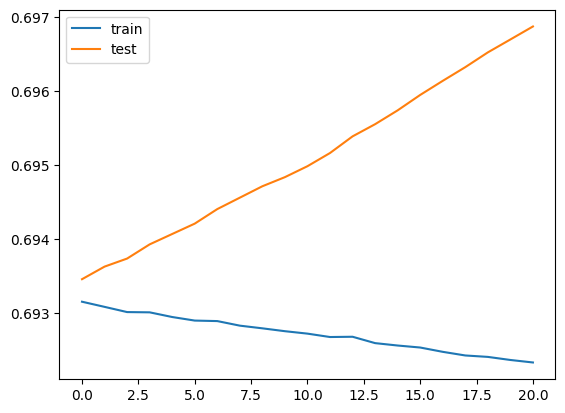

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


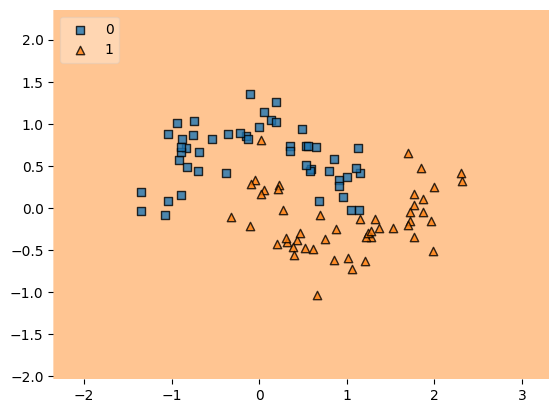

In [52]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()